In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# -1 ~ 1 까지 0.2 간격으로 10개
x=np.arange(-1.0, 1.0, 0.2)
y=np.arange(-1.0, 1.0, 0.2)
# 출력값을 저장할 10x10 그리드
z=np.zeros((10,10))
# x, y 값의 가중치(가중치값을 바꿔가면서 테스트)
w_x=2.5
w_y=3.0
# w_x=0
# w_y=3.0
# w_x=2.5
# w_y=0
# 편향(편향값을 바꿔가면서 테스트)
#bias=-2
bias=0.1
#bias=2

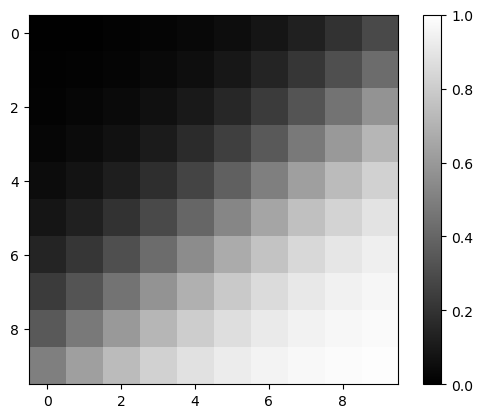

In [2]:
# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
 for j in range(10):
    # x에 가중치를 곱하고 편향을 더한 값
    u=x[i]*w_x+y[j]*w_y+bias

    # 활성화 함수(시그모이드 함수)
    y0=1/(1+np.exp(-u))
    # 출력값 저장
    z[j][i] = y0

# 그리드맵 표시
plt.imshow(z, "gray", vmin=0.0, vmax=1.0)
plt.colorbar()
plt.show()

In [3]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [4]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [5]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [6]:
diabetes.target[:3] #당수치

array([151.,  75., 141.])

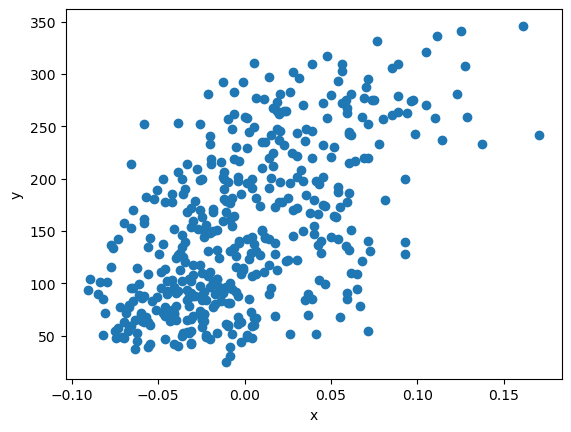

In [7]:
#bmi와 당수치는 양의 상관관계
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x') #bmi
plt.ylabel('y') #당수치
plt.show()

In [8]:
X=diabetes.data[:, 2]
y=diabetes.target

In [15]:
class Model:
   def __init__(self):
     self.w = 1.0 # 가중치 초기화
     self.b = 1.0 # 편향 초기화
    
   def forward(self, x): # 순전파
      y_hat = x * self.w + self.b
      return y_hat
   
   def backward(self, x, err): # 역전파
     w_grad = x * err
     b_grad = 1 * err
     return w_grad, b_grad
   
   def fit(self, x, y, epochs=100):
     for i in range(epochs): # epoch만큼 반복
       for x_i, y_i in zip(x, y): # 모든 샘플 반복
         y_hat = self.forward(x_i) # 순전파
         # 오차 계산(실제값-예측값)
         err=-(y_i-y_hat)
         # 역전파
         w_grad, b_grad = self.backward(x_i, err)
         self.w -= w_grad # 가중치 수정
         self.b -= b_grad # 절편 수정

       print('epoch:'+str(i+1)+',error:'+str(err),',w:',str(w_grad),',b:'+str(b_grad))

In [16]:
model=Model()
model.fit(X, y, 1000)

epoch:1,error:97.992641777963 ,w: -7.156432293026746 ,b:97.992641777963
epoch:2,error:74.35088978164467 ,w: -5.4298679879889935 ,b:74.35088978164467
epoch:3,error:65.88050094558986 ,w: -4.811272927166092 ,b:65.88050094558986
epoch:4,error:62.845722176015684 ,w: -4.589642114946713 ,b:62.845722176015684
epoch:5,error:61.75841882329888 ,w: -4.510236021953222 ,b:61.75841882329888
epoch:6,error:61.36885876947157 ,w: -4.481786333295987 ,b:61.36885876947157
epoch:7,error:61.22928683201846 ,w: -4.471593352453069 ,b:61.22928683201846
epoch:8,error:61.179280868796525 ,w: -4.467941401821344 ,b:61.179280868796525
epoch:9,error:61.16136468590632 ,w: -4.46663297756135 ,b:61.16136468590632
epoch:10,error:61.15494565928091 ,w: -4.466164194103752 ,b:61.15494565928091
epoch:11,error:61.15264584446703 ,w: -4.4659962379317015 ,b:61.15264584446703
epoch:12,error:61.15182186468206 ,w: -4.4659360624385736 ,b:61.15182186468206
epoch:13,error:61.15152664844041 ,w: -4.465914502707078 ,b:61.15152664844041
epoch:

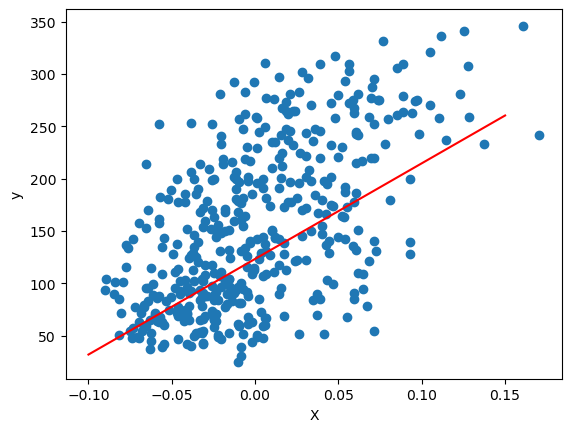

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)
pt1=(-0.1, -0.1 * model.w + model.b)
pt2=(0.15, 0.15 * model.w + model.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], c='r') #회귀선
plt.xlabel('X')
plt.ylabel('y')
plt.show()